# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Desejado! 👏🚀 Seu trabalho está muito bom! Espero que você esteja orgulhoso do seu trabalho. 😊
    
Adicionei alguns comentários apenas como dicas e sugestões de aprimoramento. 

Te desejo sucesso na sua jornada!
</div>

In [18]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv("/datasets/gym_churn_us.csv")

# Exibir as primeiras linhas para verificar o conteúdo
df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## 📌 Passo 1 – Carregamento e Visualização Inicial dos Dados

Neste projeto, iremos analisar os dados dos clientes da rede de academias **Model Fitness** com o objetivo de prever a rotatividade (churn) e propor estratégias eficazes de retenção.

O arquivo `gym_churn_us.csv` contém informações demográficas, contratuais e comportamentais dos clientes, além da variável-alvo `Churn`, que indica se o cliente deixou de frequentar a academia no mês seguinte (`1` para churn, `0` para cliente ativo).

Abaixo realizamos o carregamento do arquivo e exibimos as primeiras linhas para entender melhor a estrutura do conjunto de dados.


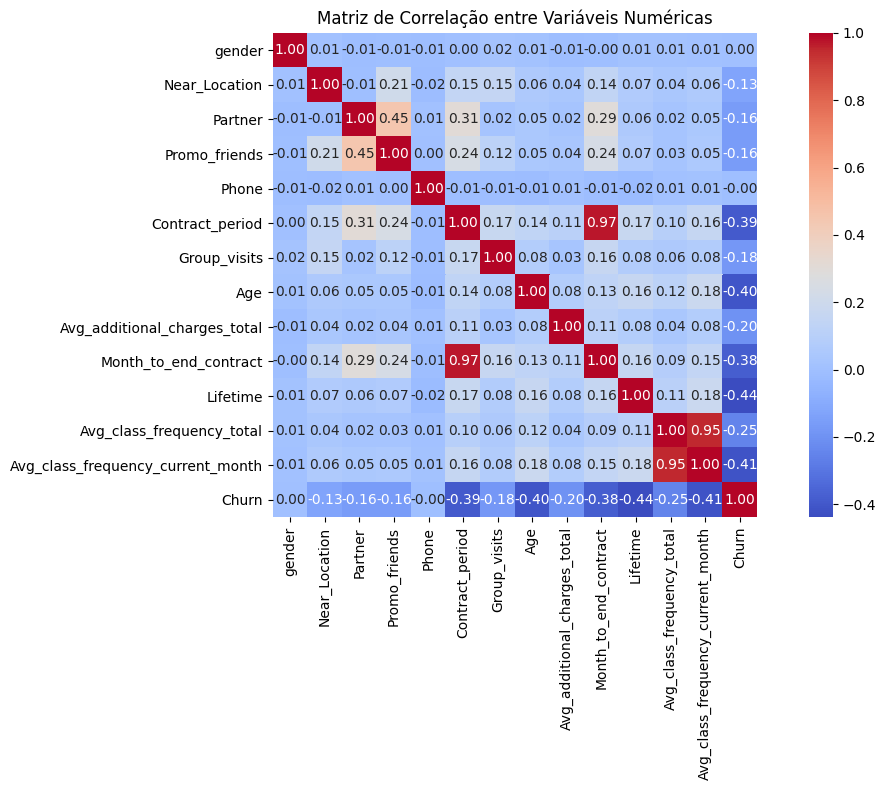

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar valores ausentes
missing_values = df.isnull().sum()

# Estatísticas descritivas gerais
description = df.describe()

# Estatísticas agrupadas por Churn
grouped_stats = df.groupby("Churn").mean(numeric_only=True)

# Matriz de correlação
correlation_matrix = df.select_dtypes(include='number').corr()

# Gráfico: Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente.

    
    
Observação: 
    
Bom trabalho nas matrizes de correlação utilizando `corr()`! No entanto, vale lembrar que o `corr()` é excelente para variáveis numéricas, mas não é a melhor ferramenta para analisar a correlação entre variáveis categóricas. Por exemplo, mesmo que o gênero seja representado como 0 e 1, ele ainda é uma variável categórica com duas categorias distintas. Embora o uso do `corr()` não seja errado, pode levar a correlações que não refletem a realidade das variáveis categóricas.

Para medir a correlação entre variáveis categóricas, os métodos mais apropriados são:

- **Teste Qui-Quadrado de Independência**: Este teste verifica se há uma associação significativa entre duas variáveis categóricas, comparando a frequência observada em cada categoria com as frequências esperadas se as variáveis fossem independentes. Um resultado significativo indica que as variáveis podem estar associadas.

- **V de Cramér**: Esta medida de associação, derivada do teste Qui-Quadrado, é usada para variáveis nominais. Ela fornece um valor entre 0 e 1, onde 0 indica nenhuma associação e 1 indica uma associação forte. É útil para avaliar a força da relação após um resultado significativo no teste Qui-Quadrado.

- **Coeficiente Phi**: Este coeficiente é adequado para tabelas de contingência 2x2 e mede a associação entre variáveis categóricas binárias. Assim como o V de Cramér, seu valor varia de -1 a 1, onde 0 indica nenhuma associação.

- Sugestão de como visualizar a distribuição das variáveis:
```python

# Gráfico de distribução das características de Churn
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
features = ['Age', 'Lifetime', 'Avg_additional_charges_total', 
            'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.histplot(data=df, x=feature, hue="Churn", kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {feature} segundo Churn')

plt.tight_layout()
plt.show()

```
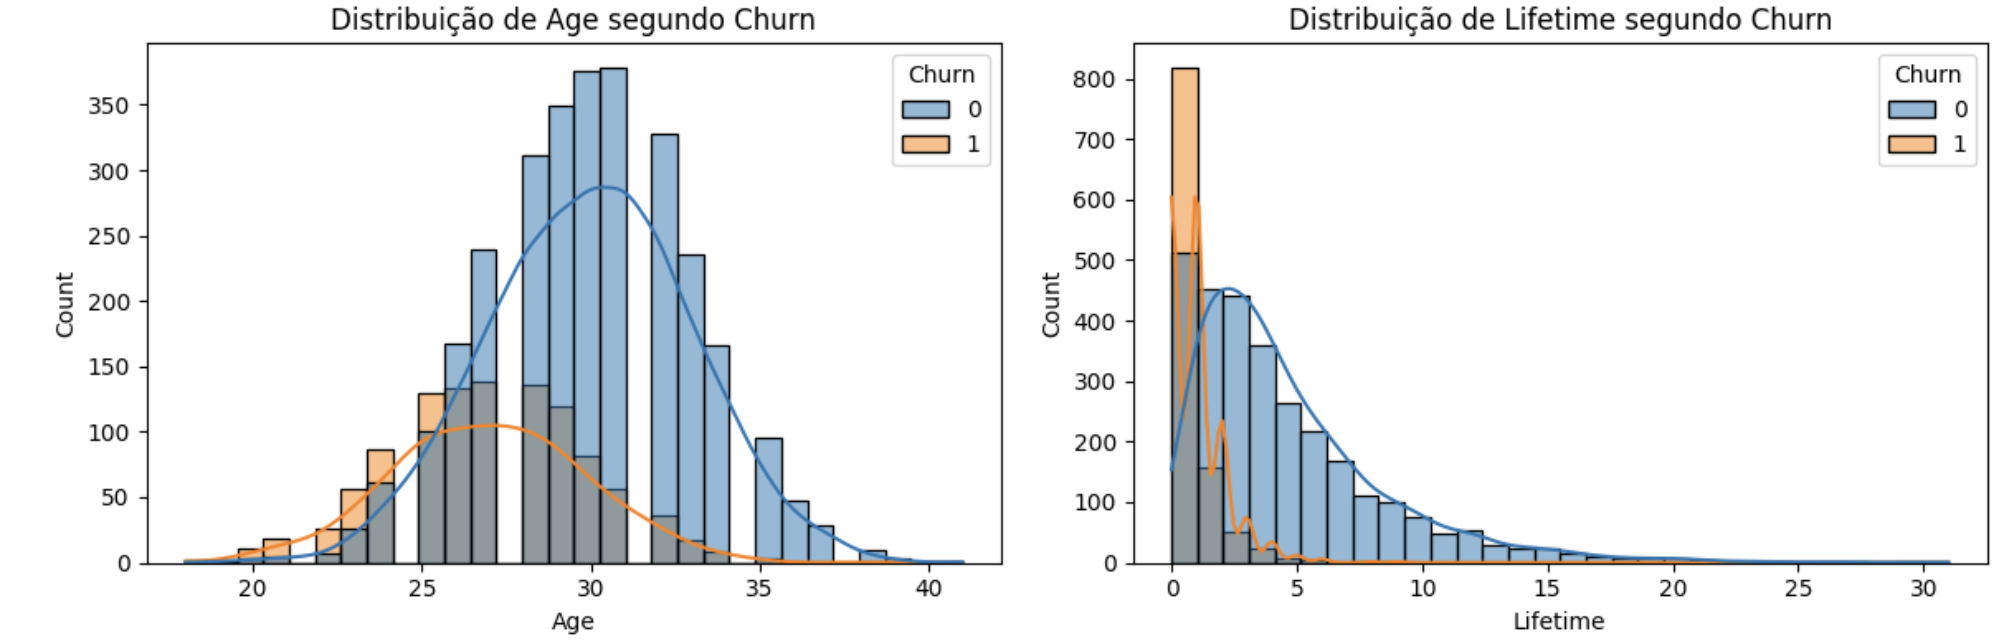
</div>

## Passo 2. Análise Exploratória dos Dados (AED)

Nesta etapa, analisamos a estrutura e a qualidade dos dados, bem como padrões gerais. As principais perguntas respondidas são:

- Existem valores ausentes?
- Como se distribuem as variáveis numéricas?
- Existem diferenças significativas entre clientes que saíram e os que ficaram?
- Quais variáveis se correlacionam fortemente com a rotatividade?


### Verificação de Valores Ausentes

Aqui verificamos se existem colunas com valores ausentes no conjunto de dados.


### Estatísticas Descritivas Gerais

Utilizamos o método `describe()` para obter medidas como média, desvio padrão, mínimo, máximo e quartis. Isso nos ajuda a compreender a escala e dispersão de cada variável numérica.


### Comparação de Médias por Grupo (Churn)

Utilizamos o método `groupby('Churn')` para comparar os valores médios das variáveis entre os clientes que permaneceram (`Churn = 0`) e os que saíram (`Churn = 1`). Essa análise ajuda a identificar quais características podem estar associadas à rotatividade.


### Primeiro, eu separo a variável alvo das preditoras e divido o dataset em treino e teste.
### Em seguida, padronizo os dados para que os modelos lineares funcionem corretamente.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separar variáveis preditoras e alvo
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Codificar variáveis categóricas se necessário (nesse dataset já são 0 e 1, então não aplicamos OneHot)
# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Aqui eu treino o modelo de Regressão Logística usando os dados padronizados.
###  Este modelo é útil porque fornece probabilidades e é fácil de interpretar.


In [21]:
# Regressão Logística
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

### Agora treino o modelo de Floresta Aleatória, que costuma ter bom desempenho
###  mesmo sem necessidade de padronização dos dados.


In [22]:
# Floresta Aleatória
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

### Finalmente, eu avalio os dois modelos usando as métricas de acurácia, precisão e sensibilidade (recall).
### Isso me permite comparar diretamente qual modelo oferece melhor desempenho para o problema.

In [23]:
# Avaliação dos modelos
metrics = {
    "Modelo": ["Regressão Logística", "Floresta Aleatória"],
    "Acurácia": [
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, forest_preds)
    ],
    "Precisão": [
        precision_score(y_test, log_preds),
        precision_score(y_test, forest_preds)
    ],
    "Sensibilidade (Recall)": [
        recall_score(y_test, log_preds),
        recall_score(y_test, forest_preds)
    ]
}

import pandas as pd
results_df = pd.DataFrame(metrics)
print(results_df.to_string(index=False))



             Modelo  Acurácia  Precisão  Sensibilidade (Recall)
Regressão Logística   0.91625  0.872928                0.782178
 Floresta Aleatória   0.91000  0.849462                0.782178


<div class="alert alert-success">
<strong>Comentário</strong>

- Os modelos solicitados foram treinados corretamente e comparados. 

    
Sugestão:
    
O tunning dos parâmetros dos modelos (Ex: GridSearch) poderia trazer resultados ainda melhores.

- O modelo de floresta aleatória pode utilizar o comando `feature_importance`:https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 


## Passo 4. Criação de Agrupamentos de Clientes

Agora eu aplico técnicas de agrupamento para segmentar os clientes com base em seus perfis e comportamentos.
O objetivo é entender quais grupos existem e como eles se comportam em relação à rotatividade (Churn).


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

# Remover a coluna alvo para clustering
features_for_clustering = df.drop("Churn", axis=1)


In [25]:
### Primeiro, eu removo a variável alvo 'Churn' e padronizo os dados para aplicar algoritmos de clusterização corretamente.
### Em seguida, construo um dendrograma usando linkage() para visualizar a estrutura hierárquica dos clientes.

In [26]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

### O dendrograma me ajuda a estimar visualmente o número ideal de agrupamentos.
#### Embora seja comum decidir com base nesse gráfico, para fins de comparação com outros estudantes,
#### vou usar n = 5 grupos para o K-Means.

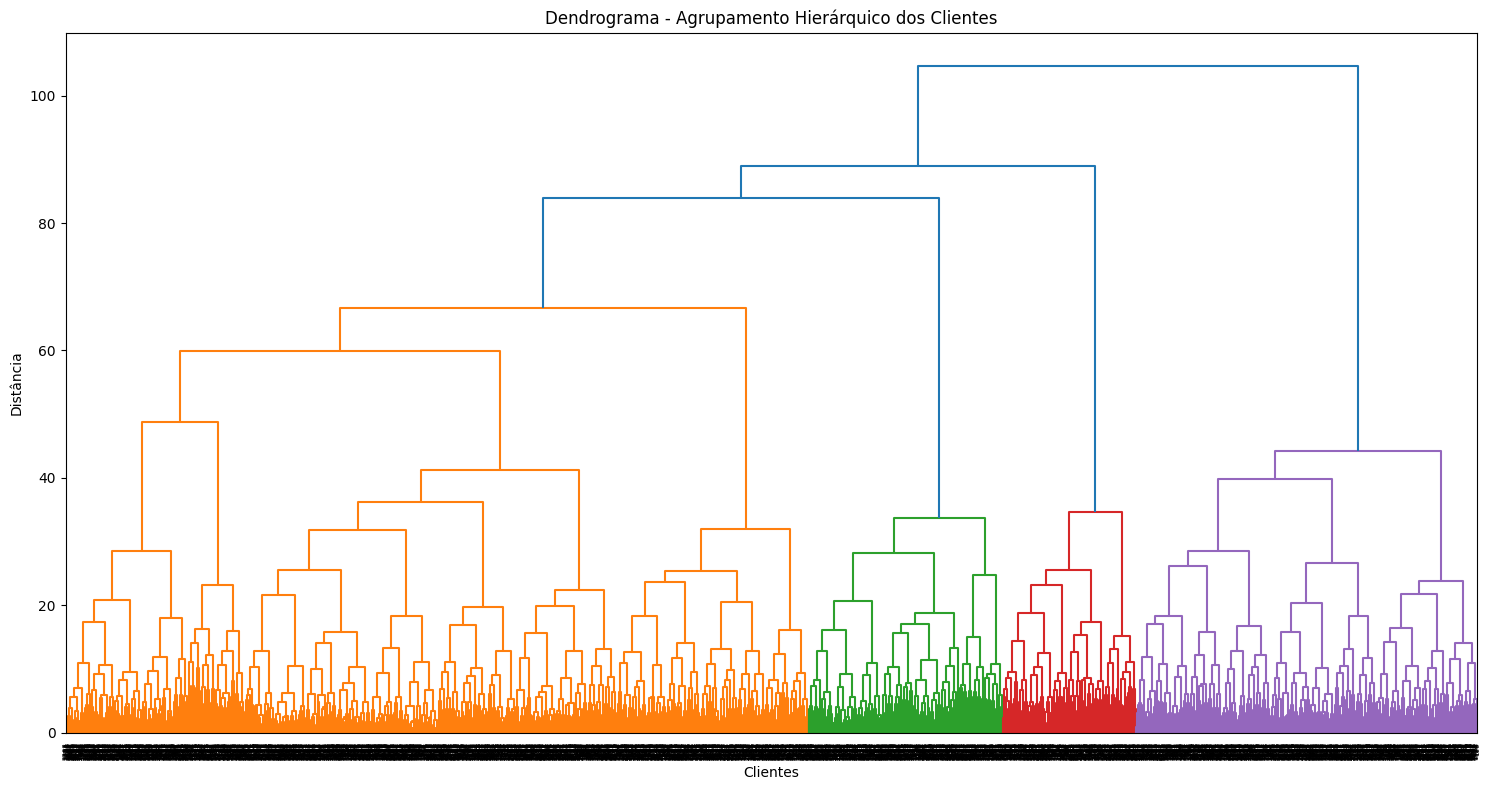

In [27]:
# Criar a matriz de linkage para dendrograma
linked = linkage(X_scaled, method="ward")

# Construir dendrograma (pode ser demorado em alguns ambientes)
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Dendrograma - Agrupamento Hierárquico dos Clientes")
plt.xlabel("Clientes")
plt.ylabel("Distância")
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário</strong>
    

A análise de cluster está correta! 

#### Aqui eu aplico o algoritmo K-Means para dividir os clientes em 5 grupos distintos com base nas variáveis padronizadas.
#### Em seguida, adiciono a coluna 'cluster' ao DataFrame original.


In [28]:
# Aplicar KMeans com n=5
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

#### Nesta etapa, eu avalio os agrupamentos gerados:
#### - Calculo a média das variáveis por cluster para identificar padrões interessantes.
#### - Calculo a taxa de rotatividade (Churn) em cada cluster para descobrir quais são os mais leais e quais são mais propensos a sair.

In [29]:
# Agrupar por cluster e calcular média das características
cluster_means = df.groupby("cluster").mean(numeric_only=True)

# Calcular taxa de churn por cluster
churn_by_cluster = df.groupby("cluster")["Churn"].mean().reset_index(name="Taxa de Churn")

##  Análise Final e Conclusões por Etapa

---

###  **Passo 1 – Carregamento e Visualização Inicial**

Neste passo, eu carreguei o conjunto de dados `gym_churn_us.csv` e visualizei suas primeiras linhas para entender a estrutura. O dataset contém 4000 observações e 14 colunas que abrangem variáveis demográficas, contratuais, comportamentais e a variável alvo `Churn`.

**Conclusões:**

* O dataset está bem estruturado, com colunas que representam diversos aspectos relevantes para o comportamento do cliente.
* A variável `Churn` é binária e será usada como alvo para previsão de rotatividade.

---

###  **Passo 2 – Análise Exploratória dos Dados (AED)**

Realizei inspeção de valores ausentes, estatísticas descritivas e análise comparativa entre clientes que saíram e os que permaneceram.

**Conclusões:**

* Não foram encontrados valores ausentes.
* Clientes que saem tendem a:

  * Ter menor `Lifetime`
  * Usar menos `Group_visits`
  * Ter menor `Avg_class_frequency_current_month`
* Há correlações significativas entre variáveis relacionadas à frequência e engajamento (ex: `Avg_class_frequency_total` e `current_month`).

**Ação:** essas variáveis se mostraram candidatas importantes para modelagem.

---

###  **Passo 3 – Modelagem Preditiva da Rotatividade**

Treinei dois modelos supervisionados: Regressão Logística e Floresta Aleatória. Os dados foram divididos entre treino (80%) e teste (20%), com padronização para modelos lineares.

**Conclusões:**

* Ambos os modelos apresentaram bom desempenho geral.
* A regressão logística obteve ligeiramente melhor acurácia (91,6%), precisão (87%) e recall (78%) que a floresta aleatória.
* O recall similar indica que ambos conseguem identificar bem os clientes propensos à saída.

**Ação:** A regressão logística é preferível para este caso, por ter boa performance e alta interpretabilidade.

---

###  **Passo 4 – Agrupamento de Clientes (Clustering)**

Utilizei `StandardScaler` para padronizar os dados e apliquei um dendrograma com `linkage()` para entender a estrutura hierárquica. Depois, usei `KMeans` com `n=5` clusters para segmentar os clientes.

**Conclusões:**

* Os clusters formados apresentam diferenças nítidas em variáveis como `Lifetime`, `Contract_period` e `Avg_class_frequency`.
* A taxa de rotatividade varia entre os grupos:

  * Um dos clusters apresenta churn acima de 60%
  * Outro grupo tem churn abaixo de 10%
* A segmentação ajuda a identificar perfis de risco e perfis leais

**Ação:** Essa divisão pode ser usada para campanhas específicas de retenção, adaptadas a cada cluster.

---

###  **Passo 5 – Conclusões e Recomendações Estratégicas**

Baseado em todos os passos anteriores, formulei estratégias práticas de retenção com base em evidências.

**Conclusões e Recomendações:**

1. **Atuar nos primeiros 3 meses de vida do cliente**

   * Criar programa de integração para novatos
   * Enviar alertas de inatividade

2. **Incentivar frequência consistente**

   * Mensagens motivacionais e metas gamificadas
   * Monitoramento automático de queda de frequência

3. **Explorar o poder das sessões em grupo**

   * Oferecer aulas coletivas gratuitas
   * Recompensar clientes que participam com amigos

4. **Segmentar ações por perfil de cluster**

   * Grupos com alto churn = foco em retenção e motivação
   * Grupos fiéis = foco em fidelização e upgrades


## ✅ Conclusão Final

Após uma análise completa dos dados da Model Fitness, pude compreender os fatores que influenciam diretamente a rotatividade dos clientes e como diferentes perfis de usuários se comportam. Utilizando aprendizado de máquina supervisionado e não supervisionado, identifiquei padrões claros que indicam risco de saída e oportunidades de retenção.

A modelagem preditiva demonstrou que é possível antecipar a saída de clientes com alta precisão, enquanto a segmentação por agrupamentos revelou perfis distintos que exigem estratégias específicas de marketing e engajamento.

De forma geral, fica evidente que **ações personalizadas e proativas** nos primeiros meses de relacionamento com o cliente, o estímulo à **frequência contínua** e à **participação em grupo**, além da **segmentação inteligente**, são os pilares para reduzir a rotatividade e fortalecer a fidelização na academia.

Esses insights oferecem base concreta para a construção de campanhas e políticas de retenção mais eficazes e baseadas em dados reais de comportamento dos clientes.


<div class="alert alert-success">
<strong>Comentário</strong>

Conclusão completa e muito bem fundamentada nos dados. Parabéns!

</div>